# Data Preprocessing

- **Note: Data Preprocessing and Exploratory Data Analysis are done interchangeably, some steps in this notebook are done before and after EDA.**

In [1]:
# Constants
DATA_PATH   = "../data/raw/full_gen_data.csv"
EXPORT_PATH = "../data/processed/1_preprocessed_df.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np

from pathlib import Path
import logging
import pickle

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [3]:
# A function to save figures 
IMAGES_PATH = Path.cwd().parent / "Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Load dataset and make a copy
raw_df = pd.read_csv(DATA_PATH)
df = raw_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

## 1 - Data Cleaning

- **As identified in the data exploration step, The dataset contains no missing values and no duplicates.**

In [6]:
# Rename some columns to be more Understandable
df.rename(columns = {'sales':'salesPerWeek','article':'product','article.1':'product.1'}, inplace = True)

In [7]:
# Change retail_week to a date format
df['retailweek'] = pd.to_datetime(df['retailweek'])

#### **Check for outliers**
- we are gonna check for outliers in salesPerweek, regular price, current price, ratio, cost.
- No need to check for outliers for promo and promo1 as they are 0 & 1 values, customer_id only have ids of customers and rgb cols as they are numbers representing colors.

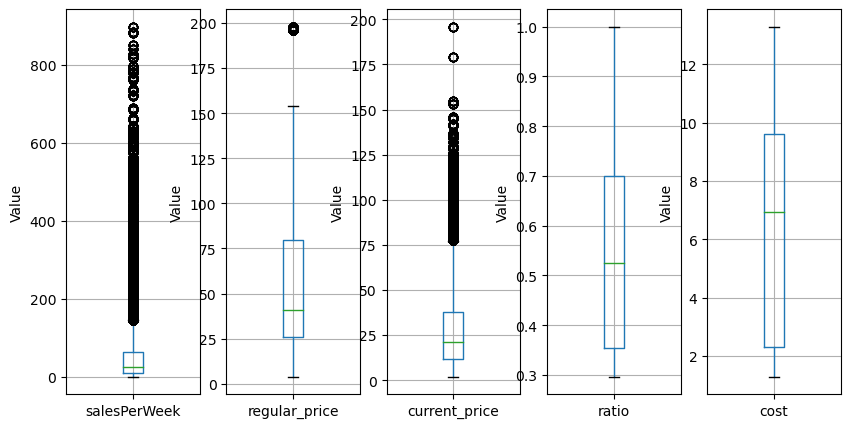

In [8]:
# Use Boxplot to identify outliers in our dataset
num_cols= ['salesPerWeek','regular_price','current_price', 'ratio', 'cost']

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

# Iterate over the numerical columns and create a boxplot for each feature
for i, col in enumerate(num_cols):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_ylabel('Value')

# Save Figure
save_fig('1-box-plot-outlier',tight_layout= False)

# Display the plot
plt.show()

- **Both salesPerWeek and Current_price has alot of outliers, regular_price column has small amount of outliers.**

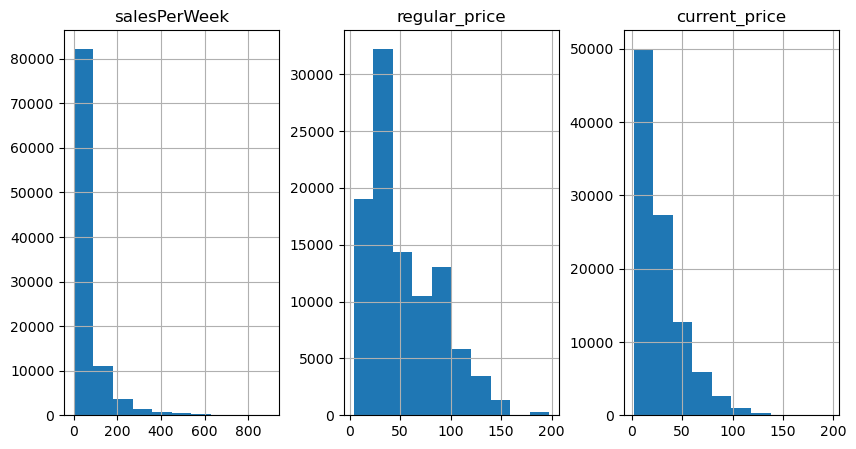

In [9]:
cols = ['salesPerWeek','regular_price','current_price']

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Iterate over the numerical columns and create a boxplot for each feature
for i, col in enumerate(cols):
    ax = axes[i]
    df.hist(column=col, ax=ax)

    
# Display the plot
plt.show()

- **Due to the importance of these columns, I don't think it is a good idea to remove outliers, but it will be dealt with in the feature engineering step.**

## 2-Feature Engineering

In [10]:
# change the ratio column to discount coulmn (discount = 1 - ratio) for clarity
df['discount'] = 1 - df['ratio']

# create a column for profit, which equals currentprice - cost
df['profit'] = df['current_price'] - df['cost']

In [11]:
# get a column for day, month, year from the retailweek column
df['day'] = df['retailweek'].dt.day
df['month'] = df['retailweek'].dt.month
df['year'] = df['retailweek'].dt.year

# create a column to capture the differnce between regular_price and current_price
df['prices_diff']=df['regular_price'] - df['current_price']

In [12]:
# Convert RGB columns to one column contain the hex number
df['hex_main'] = df.apply(lambda row: f"#{row['rgb_r_main_col']:02x}{row['rgb_g_main_col']:02x}{row['rgb_b_main_col']:02x}", axis=1)
df['hex_sec'] = df.apply(lambda row: f"#{row['rgb_r_sec_col']:02x}{row['rgb_g_sec_col']:02x}{row['rgb_b_sec_col']:02x}", axis=1)

In [13]:
print(df['hex_main'].unique())
df['hex_sec'].unique()

['#cd6839' '#bcee68' '#cdad00' '#cd8c95' '#8a2be2' '#4f94cd' '#8b1a1a'
 '#87cefa' '#b5b5b5' '#8b8989']


array(['#ffbbff', '#a4d3ee', '#cd9b9b'], dtype=object)

- **looks like we have 10 colors in the hex_main column and 3 column in the hex_sec column**

## 3-Feature Selection

In [ ]:
- **Customer_id have alot of unique values, it might not be that useful**

In [7]:
# drop the ratio column
df = df.drop(columns='ratio')

## 4-Feature Scaling

## -Export Data

In [ ]:
# Export Data
df.to_pickle(EXPORT_PATH)

In [29]:
# explore how much product got profits and got sold